# Proyek Pertama: Menyelesaikan Permasalahan Human Resources Perusahaan Jaya Jaya Maju


- Nama: Muchammad Wildan Alkautsar
- Email: muchammadwr@gmail.com
- Id Dicoding: muchammadwr


## Persiapan


### Menyiapkan library yang dibutuhkan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan


## Data Understanding


In [2]:
# Load the dataset
df = pd.read_csv("./data/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
df.iloc[:, : len(df.columns) // 2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeId               1470 non-null   int64  
 1   Age                      1470 non-null   int64  
 2   Attrition                1058 non-null   float64
 3   BusinessTravel           1470 non-null   object 
 4   DailyRate                1470 non-null   int64  
 5   Department               1470 non-null   object 
 6   DistanceFromHome         1470 non-null   int64  
 7   Education                1470 non-null   int64  
 8   EducationField           1470 non-null   object 
 9   EmployeeCount            1470 non-null   int64  
 10  EnvironmentSatisfaction  1470 non-null   int64  
 11  Gender                   1470 non-null   object 
 12  HourlyRate               1470 non-null   int64  
 13  JobInvolvement           1470 non-null   int64  
 14  JobLevel                

- **EmployeeId** - Employee Identifier
- **Attrition** - Did the employee attrition? (0=no, 1=yes)
- **Age** - Age of the employee
- **BusinessTravel** - Travel commitments for the job
- **DailyRate** - Daily salary
- **Department** - Employee Department
- **DistanceFromHome** - Distance from work to home (in km)
- **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
- **EducationField** - Field of Education
- **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
- **Gender** - Employee's gender
- **HourlyRate** - Hourly salary
- **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
- **JobLevel** - Level of job (1 to 5)
- **JobRole** - Job Roles
- **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High


In [4]:
df.iloc[:, len(df.columns) // 2 :].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   MaritalStatus             1470 non-null   object
 1   MonthlyIncome             1470 non-null   int64 
 2   MonthlyRate               1470 non-null   int64 
 3   NumCompaniesWorked        1470 non-null   int64 
 4   Over18                    1470 non-null   object
 5   OverTime                  1470 non-null   object
 6   PercentSalaryHike         1470 non-null   int64 
 7   PerformanceRating         1470 non-null   int64 
 8   RelationshipSatisfaction  1470 non-null   int64 
 9   StandardHours             1470 non-null   int64 
 10  StockOptionLevel          1470 non-null   int64 
 11  TotalWorkingYears         1470 non-null   int64 
 12  TrainingTimesLastYear     1470 non-null   int64 
 13  WorkLifeBalance           1470 non-null   int64 
 14  YearsAtCompany          

- **MaritalStatus** - Marital Status
- **MonthlyIncome** - Monthly salary
- **MonthlyRate** - Mounthly rate
- **NumCompaniesWorked** - Number of companies worked at
- **Over18** - Over 18 years of age?
- **OverTime** - Overtime?
- **PercentSalaryHike** - The percentage increase in salary last year
- **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
- **StandardHours** - Standard Hours
- **StockOptionLevel** - Stock Option Level
- **TotalWorkingYears** - Total years worked
- **TrainingTimesLastYear** - Number of training attended last year
- **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
- **YearsAtCompany** - Years at Company
- **YearsInCurrentRole** - Years in the current role
- **YearsSinceLastPromotion** - Years since the last promotion
- **YearsWithCurrManager** - Years with the current manager


## Data Preparation / Preprocessing


In [5]:
# Check missing values
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

There is a 412 mission values on Attrition Columns


In [6]:
# Handle Missing Values
df.dropna(inplace=True)

In [7]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [8]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


membuat kolom baru dari attrition kategorical


## Exploratory Data Analysis


#### Persentase dari Attrition


In [9]:
df["Attrition"] = df["Attrition"].astype("int")
df["AttritionCategory"] = df["Attrition"].map({1: "Leave", 0: "Stay"})
attrition_rate = df["AttritionCategory"].value_counts(normalize=True) * 100
print(f"Attrition Rate:\n{attrition_rate.round(2)}")

Attrition Rate:
AttritionCategory
Stay     83.08
Leave    16.92
Name: proportion, dtype: float64


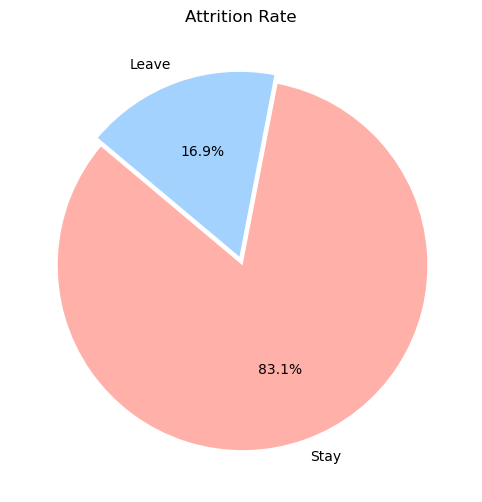

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.pie(
    attrition_rate,
    labels=attrition_rate.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#FFB0A9", "#A4D2FF"],
    explode=(0.025, 0.025),
)
plt.title("Attrition Rate")
plt.show()

Tingkat attrition perusahaan saat ini berada di angka 16,92%, sementara 83,08% karyawan memilih untuk tetap bekerja


### Analisis Demography


#### Jumlah karyawan keluar berdasarkan rentang usia


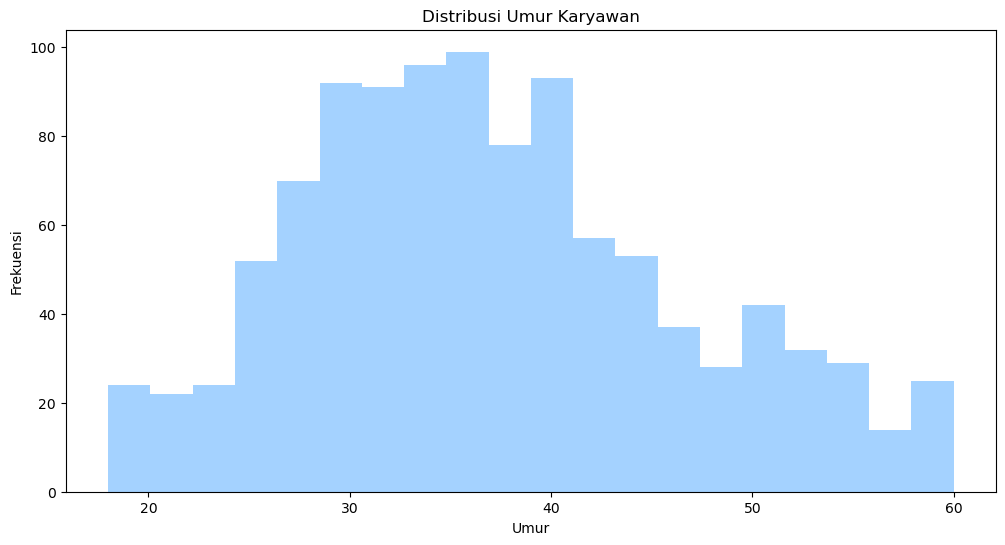

In [11]:
# Melihat distribusi data numerik
plt.figure(figsize=(12, 6))
plt.hist(df["Age"], bins=20, color="#A4D2FF")
plt.title("Distribusi Umur Karyawan")
plt.xlabel("Umur")
plt.ylabel("Frekuensi")
plt.show()

Histogram menunjukkan bahwa mayoritas karyawan berada dalam rentang usia 30 hingga 40 tahun, dengan frekuensi tertinggi sekitar 100 orang. Jumlah karyawan menurun secara bertahap setelah usia 40 tahun, sementara kelompok usia di bawah 25 tahun dan di atas 55 tahun memiliki frekuensi paling rendah. Pola ini menunjukkan dominasi usia produktif di perusahaan dan kemungkinan rendahnya perekrutan usia muda maupun retensi karyawan senior.


#### Karyawan Keluar by Age


In [12]:
# Binning 10 tahun
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# pivot
attr_age = df.pivot_table(
    index="AgeGroup",
    columns="AttritionCategory",
    values="EmployeeId",
    aggfunc="count",
).round(2)

attr_age

AttritionCategory,Leave,Stay
AgeGroup,,
18-24,29,41
25-34,85,316
35-44,39,312
45-54,17,164
55-64,9,46


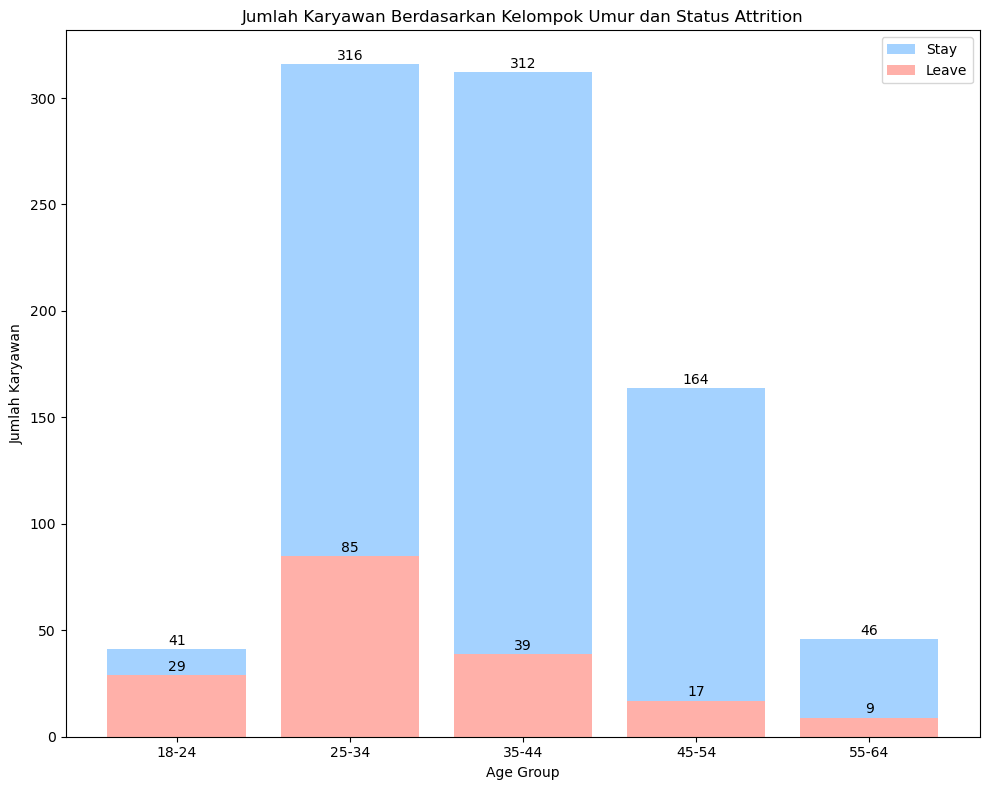

In [13]:
# Visualisasi
x = attr_age.index
stay = attr_age["Stay"]
leave = attr_age["Leave"]

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(
    x,
    stay,
    label="Stay",
    color="#A4D2FF",
)
ax.bar(
    x,
    leave,
    label="Leave",
    color="#FFB0A9",
)

for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Age Group")
ax.set_ylabel("Jumlah Karyawan")
ax.set_title("Jumlah Karyawan Berdasarkan Kelompok Umur dan Status Attrition")
ax.legend()
plt.tight_layout()
plt.show()

- Kelompok usia 25–34 tahun memiliki jumlah karyawan keluar terbanyak (85 orang), meskipun juga merupakan kelompok dengan jumlah karyawan terbanyak secara keseluruhan.
- Kelompok usia 18–24 tahun memiliki rasio attrition tertinggi, yaitu sekitar 41% (29 dari 70 orang).
- Sementara itu, kelompok usia 45 tahun ke atas menunjukkan tingkat attrition yang lebih rendah, mengindikasikan kecenderungan bertahan yang lebih tinggi pada usia yang lebih senior.


#### Karyawan keluar berdasarkan gender


In [14]:
# Pivot
gender_attrition = pd.pivot_table(
    df,
    index="Gender",
    columns="AttritionCategory",
    values="EmployeeId",
    aggfunc="count",
)
gender_attrition

AttritionCategory,Leave,Stay
Gender,,
Female,71,367
Male,108,512


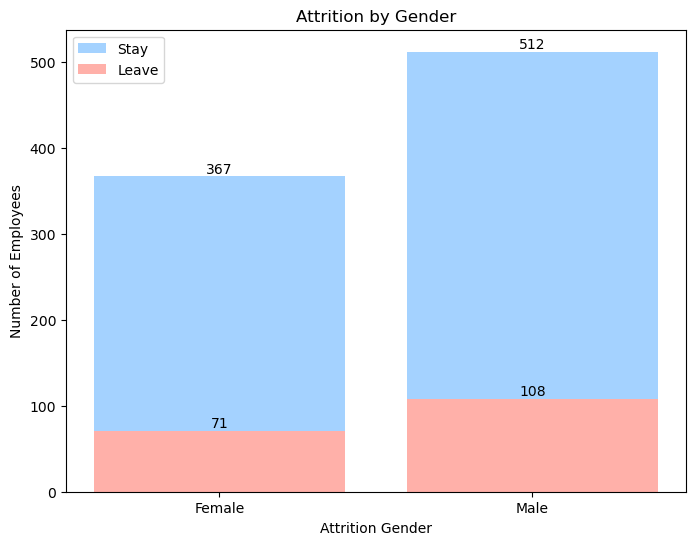

In [15]:
# Visualisasi
x = gender_attrition.index
stay = gender_attrition["Stay"]
leave = gender_attrition["Leave"]


fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.legend()
ax.set_xlabel("Attrition Gender")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Gender")

plt.show()

- Karyawan laki-laki memiliki jumlah karyawan keluar terbanyak, yaitu 108 orang dari total 620.
- Karyawan perempuan yang keluar sebanyak 71 orang dari total 438.
- Meskipun jumlah totalnya berbeda, tingkat attrition antara pria dan wanita hampir sama, yaitu sekitar 17% untuk pria dan 16% untuk wanita.


#### Karyawan keluar berdasarkan status pernikahan


In [16]:
# Pivot
marital_attrition = (
    pd.pivot_table(
        df,
        index="MaritalStatus",
        values="EmployeeId",
        columns="AttritionCategory",
        aggfunc="count",
        sort=True,
    )
).sort_values(by="Stay", ascending=False)
marital_attrition

AttritionCategory,Leave,Stay
MaritalStatus,,
Married,62,402
Single,94,258
Divorced,23,219


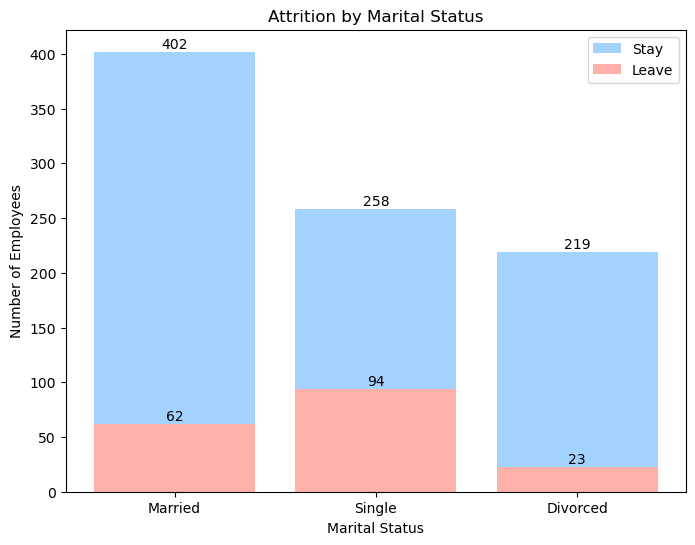

In [17]:
# Visualisasi
x = marital_attrition.index
stay = marital_attrition["Stay"]
leave = marital_attrition["Leave"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Marital Status")
ax.legend()
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Marital Status")
plt.show()

terlihat bahwa karyawan berstatus Single memiliki angka attrition (Leave) tertinggi yaitu 94 orang, meskipun jumlah total mereka tidak sebanyak yang Married. Sebaliknya, karyawan Married lebih cenderung bertahan, dengan jumlah Stay yang paling tinggi yaitu 402 orang, dan hanya 62 orang yang keluar. Sementara itu, karyawan Divorced menunjukkan angka attrition yang paling rendah (23 orang)


#### Karyawan Keluar berdasarkan Pendidikan


In [18]:
education_categorical = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor",
}

df["EducationCategory"] = df["Education"].map(education_categorical)
education_attrition_categorical = pd.pivot_table(
    df,
    values="EmployeeId",
    index="EducationCategory",
    columns="AttritionCategory",
    aggfunc="count",
)
education_attrition_categorical

AttritionCategory,Leave,Stay
EducationCategory,,
Bachelor,76,334
Below College,26,105
College,31,177
Doctor,2,31
Master,44,232


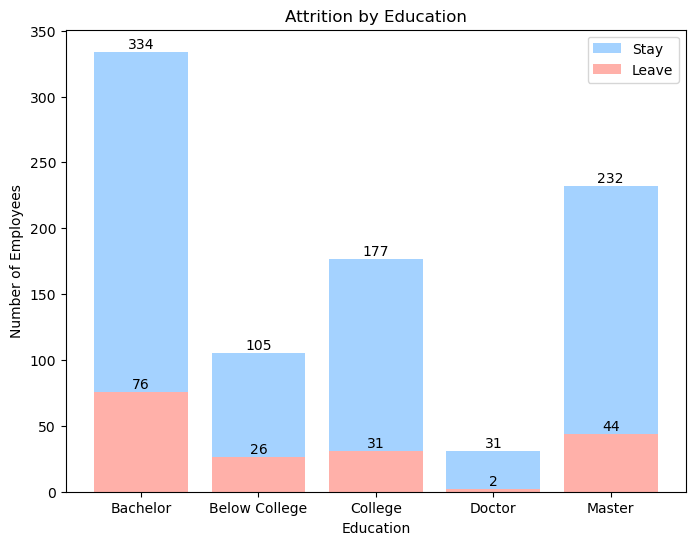

In [19]:
# Visualisasi
x = education_attrition_categorical.index
stay = education_attrition_categorical["Stay"]
leave = education_attrition_categorical["Leave"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Education")
ax.legend()
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Education")
plt.show()

karyawan dengan pendidikan Bachelor memiliki angka attrition tertinggi yaitu 76 orang, meskipun juga merupakan kelompok dengan jumlah Stay terbanyak (334 orang), menandakan proporsi besar dalam populasi. Kelompok Master menyusul dengan 44 orang yang keluar dari total 276, menunjukkan tingkat attrition sedang. Sementara itu, karyawan dengan gelar Doctor menunjukkan attrition paling rendah, hanya 2 orang dari 33, mengindikasikan tingkat retensi yang sangat tinggi pada tingkat pendidikan tertinggi.


#### Attrition by Education Field


In [20]:
education_field = pd.pivot_table(
    df,
    values="EmployeeId",
    index="EducationField",
    columns="AttritionCategory",
    aggfunc="count",
)

education_field

AttritionCategory,Leave,Stay
EducationField,,
Human Resources,2,13
Life Sciences,70,366
Marketing,26,96
Medical,46,284
Other,10,49
Technical Degree,25,71


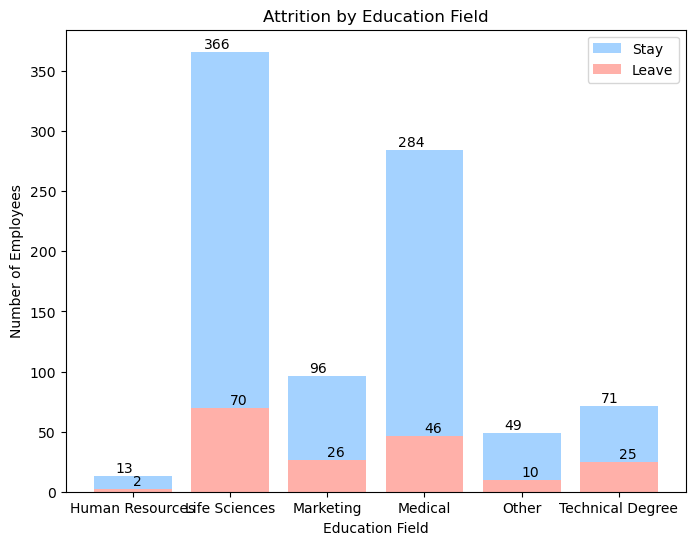

In [21]:
# Visualisasi
x = education_field.index
stay = education_field["Stay"]
leave = education_field["Leave"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="right", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="left", va="bottom", fontsize=10)
ax.set_xlabel("Education Field")
ax.legend()
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Education Field")
plt.show()

karyawan dengan latar belakang pendidikan Life Sciences memiliki jumlah attrition tertinggi yaitu 70 orang, namun juga mendominasi dalam jumlah karyawan yang bertahan (366 orang), menunjukkan proporsi besar dalam populasi. Bidang Medical juga mencatat attrition cukup tinggi (46 orang) meskipun jumlah stay-nya juga besar (284 orang), menandakan tantangan retensi yang perlu diperhatikan. Sebaliknya, bidang Human Resources memiliki angka attrition paling rendah (2 orang)


### Analisis Pekerjaan dan Penghasilan


#### Attrition by Department


In [22]:
# Pivot
department_attrition = pd.pivot_table(
    df,
    index="Department",
    values="EmployeeId",
    columns="AttritionCategory",
    aggfunc="count",
)
department_attrition

AttritionCategory,Leave,Stay
Department,,
Human Resources,6,32
Research & Development,107,594
Sales,66,253


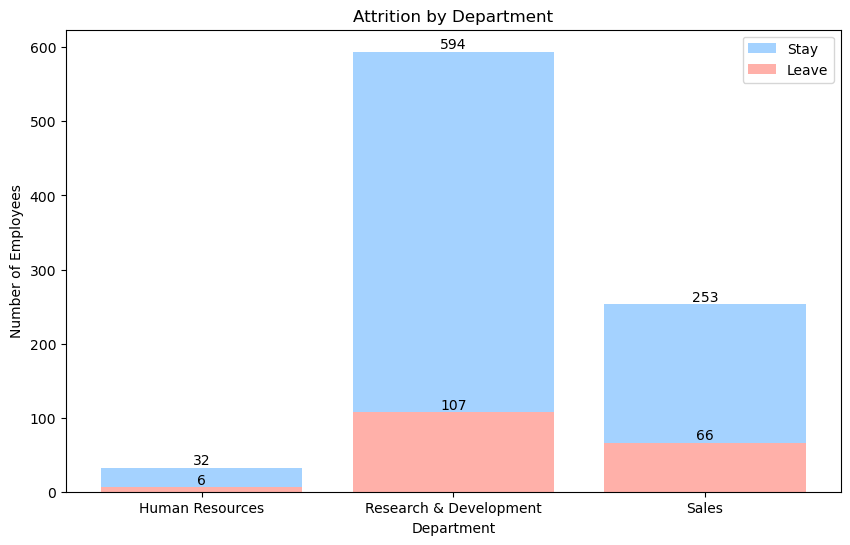

In [23]:
# Visualisasi
x = department_attrition.index
stay = department_attrition["Stay"]
leave = department_attrition["Leave"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Department")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Department")
ax.legend()
plt.show()

departemen Research & Development memiliki jumlah attrition tertinggi yaitu 107 karyawan, yang juga sebanding dengan total populasi terbesar (701 orang) di antara semua departemen. Departemen Sales mencatat angka attrition sebesar 66 karyawan, atau sekitar 20% dari total departemen tersebut. Sementara itu, Human Resources memiliki angka attrition terendah (6 karyawan), namun juga merupakan departemen dengan jumlah karyawan paling sedikit (38 orang)


#### Attrition by Job Role


In [24]:
job_role_attrition = pd.pivot_table(
    df,
    index="JobRole",
    columns="AttritionCategory",
    values="EmployeeId",
    aggfunc="count",
).sort_values(by="Stay", ascending=False)

job_role_attrition

AttritionCategory,Leave,Stay
JobRole,,
Sales Executive,39,193
Research Scientist,38,176
Laboratory Technician,49,139
Manufacturing Director,7,100
Healthcare Representative,8,80
Manager,5,74
Research Director,2,60
Sales Representative,25,33
Human Resources,6,24


In [25]:
category_job_role = {
    "Sales Executive": "Sales",
    "Research Scientist": "Research",
    "Laboratory Technician": "Research",
    "Manufacturing Director": "Manufacturing",
    "Healthcare Representative": "Healthcare",
    "Manager": "Management",
    "Sales Representative": "Sales",
    "Research Director": "Research",
    "Human Resources": "HR",
}

df["JobRoleCategory"] = df["JobRole"].map(category_job_role)

In [26]:
# Pivot
job_role_attr_category = pd.pivot_table(
    df,
    index="JobRoleCategory",
    values="EmployeeId",
    columns="AttritionCategory",
    aggfunc="count",
).sort_values(by="Stay", ascending=False)
job_role_attr_category

AttritionCategory,Leave,Stay
JobRoleCategory,,
Research,89,375
Sales,64,226
Manufacturing,7,100
Healthcare,8,80
Management,5,74
HR,6,24


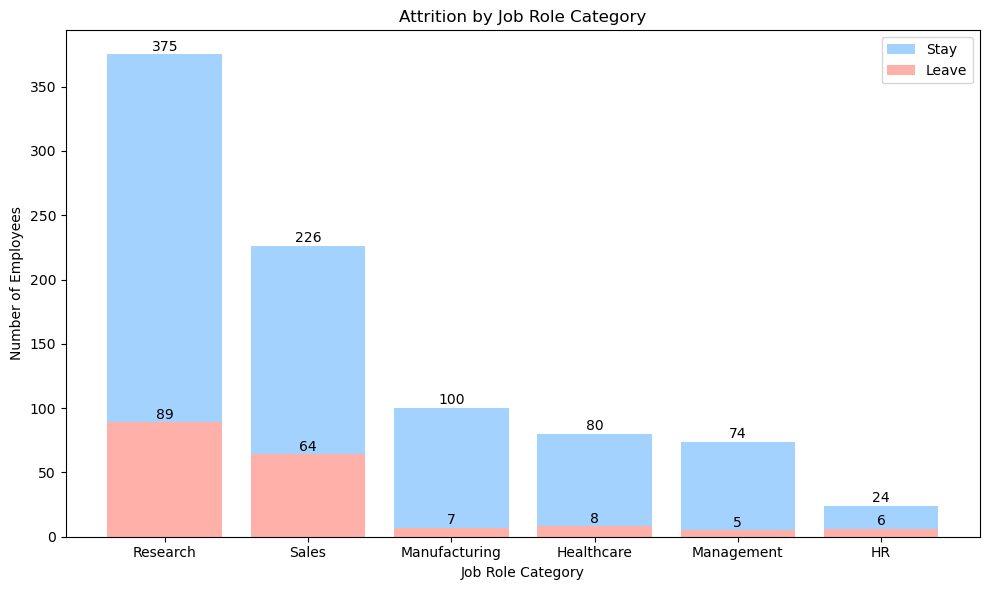

In [27]:
# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
x = job_role_attr_category.index
stay = job_role_attr_category["Stay"]
leave = job_role_attr_category["Leave"]
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Job Role Category")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Job Role Category")
ax.legend()
plt.tight_layout()
plt.show()

- Kategori pekerjaan Research memiliki jumlah karyawan keluar tertinggi, yaitu 89 orang dari 464, dengan tingkat attrition sekitar 19%.
- Kategori Sales menunjukkan tingkat attrition yang cukup tinggi juga, yaitu 64 dari 290 orang (sekitar 22%).
- Sementara itu, kategori seperti Management, Healthcare, dan Manufacturing menunjukkan attrition yang rendah — semuanya di bawah 10% — menandakan kestabilan lebih tinggi di peran-peran tersebut.
- Kategori HR memiliki tingkat attrition sekitar 20% (6 dari 30 orang), lebih tinggi dibanding beberapa kategori lainnya meskipun dengan jumlah total karyawan yang lebih kecil.


#### Job level by attrition


In [28]:
job_level = {
    1: "Staff ",
    2: "Associate ",
    3: "Senior Staff",
    4: "Manager ",
    5: "Senior Manager",
}

df["JobLevelCategory"] = df["JobLevel"].map(job_level)

In [29]:
job_level_category = pd.pivot_table(
    df,
    values="EmployeeId",
    index="JobLevelCategory",
    columns="AttritionCategory",
    aggfunc="count",
)

job_level_category

AttritionCategory,Leave,Stay
JobLevelCategory,,
Associate,37,327
Manager,4,76
Senior Manager,5,50
Senior Staff,25,140
Staff,108,286


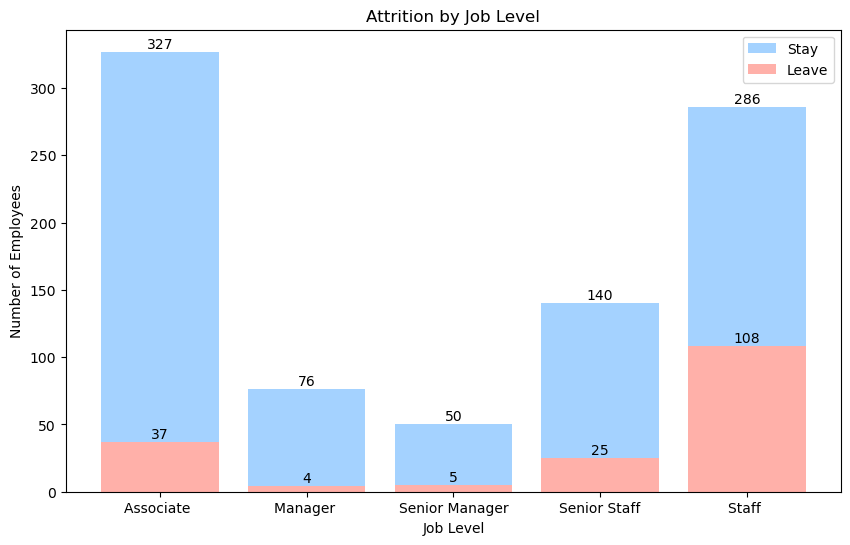

In [30]:
# Visualisasi
x = job_level_category.index
stay = job_level_category["Stay"]
leave = job_level_category["Leave"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Job Level")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Job Level")
ax.legend()
plt.show()

karyawan dengan level Staff mencatat jumlah attrition tertinggi sebanyak 108 orang, meskipun juga memiliki populasi stay yang cukup besar (286 orang), menandakan risiko keluar yang signifikan pada level awal. Sementara itu, level Associate memiliki angka stay tertinggi (327 orang) dengan attrition yang relatif rendah (37 orang), mengindikasikan stabilitas yang lebih baik di level ini. Posisi manajerial seperti Manager dan Senior Manager memiliki angka attrition yang sangat rendah (masing-masing 4 dan 5 orang),


#### Attrition by MonthlyIncome


In [31]:
avg_monthly_income = pd.pivot_table(
    df, columns="AttritionCategory", values="MonthlyIncome", aggfunc="mean"
)

avg_monthly_income.head().round(2)

AttritionCategory,Leave,Stay
MonthlyIncome,4872.94,6982.93


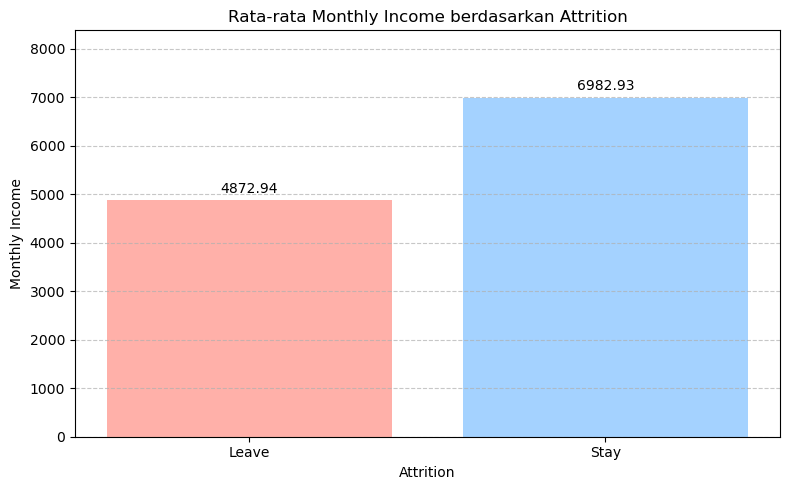

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))
colors = ["#FFB0A9", "#A4D2FF"]
bars = ax.bar(avg_monthly_income.columns, avg_monthly_income.values[0], color=colors)
# Menambahkan label di atas setiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100,  # sedikit di atas bar
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )
# Label dan gaya plot
ax.set_title("Rata-rata Monthly Income berdasarkan Attrition")
ax.set_ylabel("Monthly Income")
ax.set_xlabel("Attrition")
ax.set_ylim(0, max(avg_monthly_income.values[0]) * 1.2)  # ruang untuk label atas
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

terlihat bahwa karyawan yang keluar (Leave) memiliki rata-rata Monthly Income sebesar 4,872.94, sedangkan karyawan yang tetap bekerja (Stay) memiliki rata-rata 6,982.93. Ini menunjukkan perbedaan pendapatan yang cukup signifikan, di mana karyawan dengan gaji bulanan yang lebih tinggi cenderung lebih bertahan. Temuan ini mendukung hipotesis bahwa tingkat kompensasi yang lebih tinggi dapat berperan dalam meningkatkan retensi karyawan.


#### Attrition by Business Travel


In [33]:
# Pivot
attrition_by_business_travel = pd.pivot_table(
    df,
    index="BusinessTravel",
    values="EmployeeId",
    columns="AttritionCategory",
    aggfunc="count",
)
attrition_by_business_travel

AttritionCategory,Leave,Stay
BusinessTravel,,
Non-Travel,11,96
Travel_Frequently,51,154
Travel_Rarely,117,629


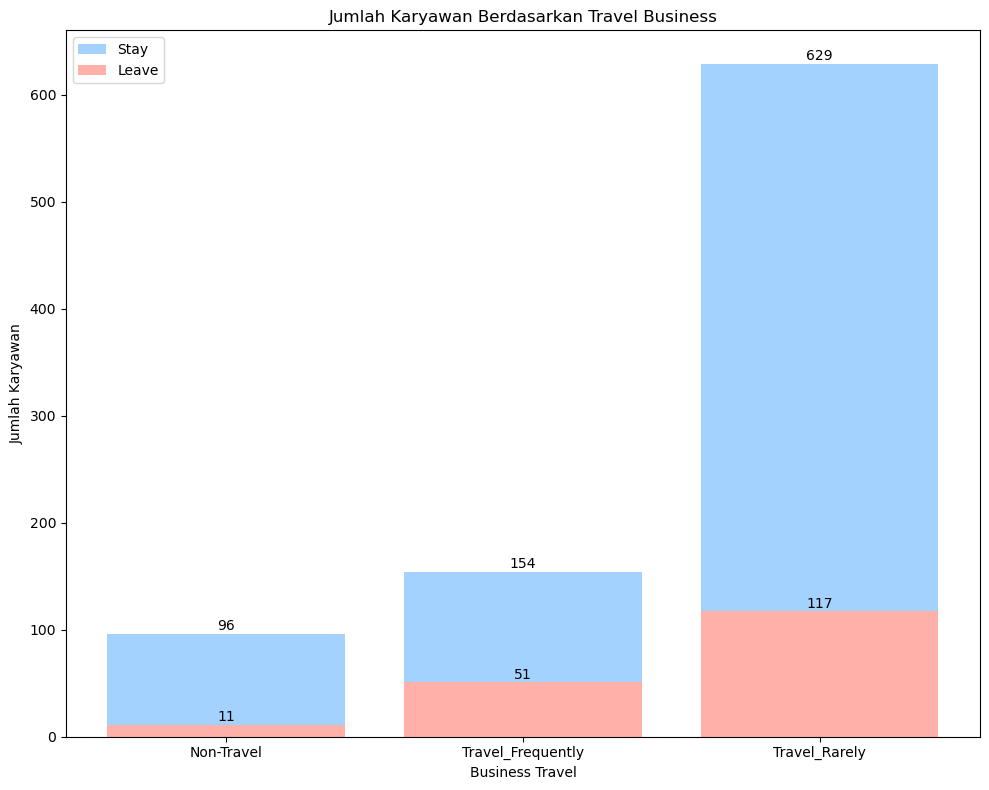

In [34]:
# Visualisasi
x = attrition_by_business_travel.index
stay = attrition_by_business_travel["Stay"]
leave = attrition_by_business_travel["Leave"]

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(
    x,
    stay,
    label="Stay",
    color="#A4D2FF",
)
ax.bar(
    x,
    leave,
    label="Leave",
    color="#FFB0A9",
)

for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Business Travel")
ax.set_ylabel("Jumlah Karyawan")
ax.set_title("Jumlah Karyawan Berdasarkan Travel Business")
ax.legend()
plt.tight_layout()
plt.show()

karyawan yang jarang melakukan perjalanan bisnis (Travel_Rarely) memiliki angka attrition tertinggi yaitu 117 orang, sejalan dengan populasi terbesar mereka (746 total). Menariknya, karyawan yang sering melakukan perjalanan (Travel_Frequently) mencatat attrition sebesar 51 orang dari 205 total, yang berarti secara persentase risiko keluar lebih tinggi dibandingkan kategori lainnya. Sementara itu, karyawan dengan status Non-Travel memiliki tingkat attrition paling rendah (11 orang),


### Kepuasan dan Keterlibatan


#### Attrition by Job Satisfaction


In [35]:
# Pivot
satisfaction_category = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

df["JobSatisfactionCategory"] = pd.cut(
    df["JobSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction_category.values()),
    right=True,
)

job_satisfaction_categorical = pd.pivot_table(
    df,
    index="JobSatisfactionCategory",
    columns="AttritionCategory",
    values="Attrition",
    aggfunc="count",
).sort_values(by="Stay", ascending=False)

job_satisfaction_categorical

AttritionCategory,Leave,Stay
JobSatisfactionCategory,,
Very High,39,301
High,62,256
Medium,32,163
Low,46,159


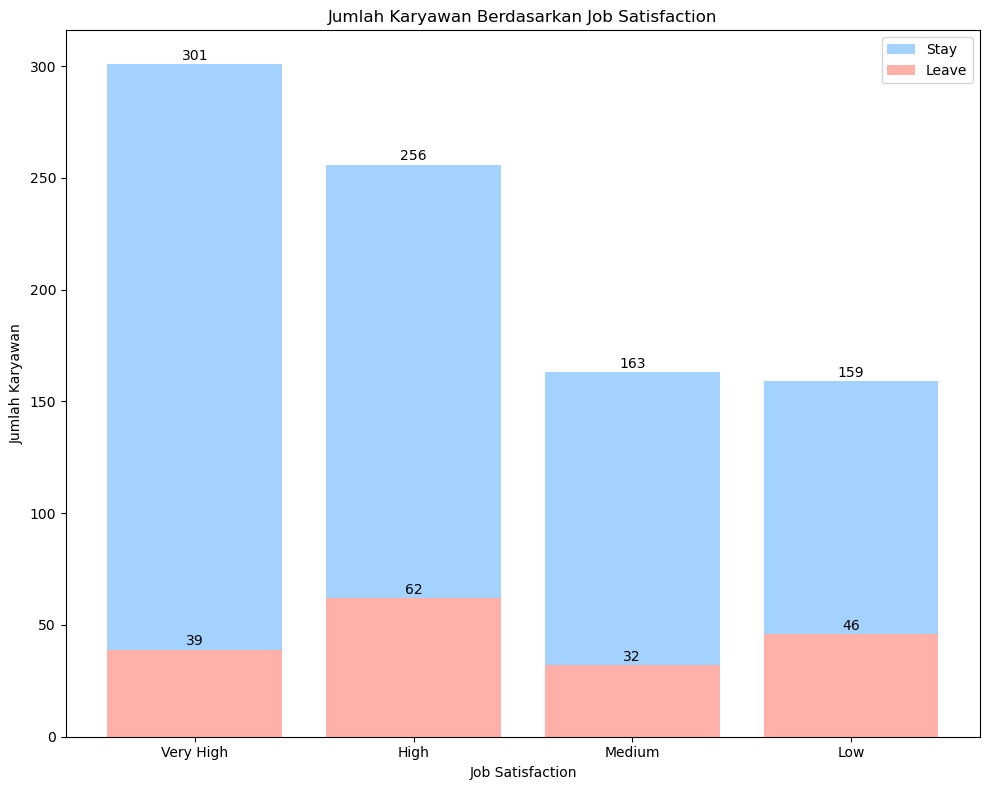

In [36]:
# Visualisasi
x = job_satisfaction_categorical.index
stay = job_satisfaction_categorical["Stay"]
leave = job_satisfaction_categorical["Leave"]

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(
    x,
    stay,
    label="Stay",
    color="#A4D2FF",
)
ax.bar(
    x,
    leave,
    label="Leave",
    color="#FFB0A9",
)

for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)

ax.set_xlabel("Job Satisfaction")
ax.set_ylabel("Jumlah Karyawan")
ax.set_title("Jumlah Karyawan Berdasarkan Job Satisfaction")
ax.legend()
plt.tight_layout()
plt.show()

karyawan dengan tingkat Job Satisfaction tertinggi (Very High) menunjukkan angka attrition yang paling rendah secara persentase, yaitu 39 orang dari 340 total, mencerminkan dampak positif kepuasan kerja terhadap retensi. Sebaliknya, kategori High justru mencatat jumlah attrition tertinggi (62 orang), meskipun ini mungkin disebabkan oleh jumlah populasi yang besar. Sementara itu, karyawan dengan Low Job Satisfaction menunjukkan rasio keluar yang cukup signifikan (46 dari 205), menguatkan indikasi bahwa kepuasan kerja yang rendah berkontribusi pada keputusan untuk resign.


#### Attrition by Environment Satisfaction


In [37]:
# Pivot
satisfaction_category = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

df["EnvironmentSatisfactionCategory"] = pd.cut(
    df["EnvironmentSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(satisfaction_category.values()),
    right=True,
)

environment_satisfaction_category = pd.pivot_table(
    df,
    index="EnvironmentSatisfactionCategory",
    columns="AttritionCategory",
    values="Attrition",
    aggfunc="count",
)

environment_satisfaction_category

AttritionCategory,Leave,Stay
EnvironmentSatisfactionCategory,,
Low,57,152
Medium,35,165
High,47,288
Very High,40,274


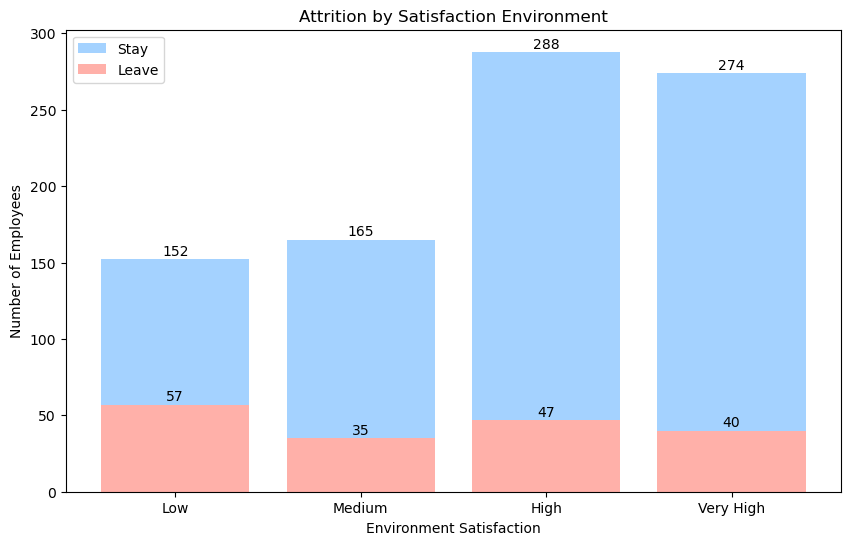

In [38]:
# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
x = environment_satisfaction_category.index
stay = environment_satisfaction_category["Stay"]
leave = environment_satisfaction_category["Leave"]
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Environment Satisfaction")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Satisfaction Environment")
ax.legend()
plt.show()

karyawan dengan tingkat Environment Satisfaction yang rendah (Low) memiliki jumlah attrition tertinggi, yaitu 57 orang dari 209, mengindikasikan kondisi lingkungan kerja yang buruk dapat mendorong keputusan untuk resign. Sementara itu, kategori Very High dan High menunjukkan tingkat retensi yang lebih baik, masing-masing dengan jumlah stay sebesar 274 dan 288, serta angka leave yang relatif lebih rendah (40 dan 47). Kategori Medium juga memperlihatkan kecenderungan yang lebih stabil, dengan jumlah leave terendah kedua (35 orang), namun distribusi antar kategori menunjukkan bahwa kepuasan terhadap lingkungan kerja berkorelasi positif terhadap retensi karyawan.


#### Attrition by Relationship Satisfaction


In [39]:
# Pivot
relationship_category = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

df["RelationshipSatisfactionCategory"] = pd.cut(
    df["RelationshipSatisfaction"],
    bins=[0, 1, 2, 3, 4],
    labels=list(relationship_category.values()),
    right=True,
)

attrition_by_relationship_categorical = pd.pivot_table(
    df,
    index="RelationshipSatisfactionCategory",
    columns="AttritionCategory",
    values="Attrition",
    aggfunc="count",
)

attrition_by_relationship_categorical

AttritionCategory,Leave,Stay
RelationshipSatisfactionCategory,,
Low,46,155
Medium,32,178
High,49,275
Very High,52,271


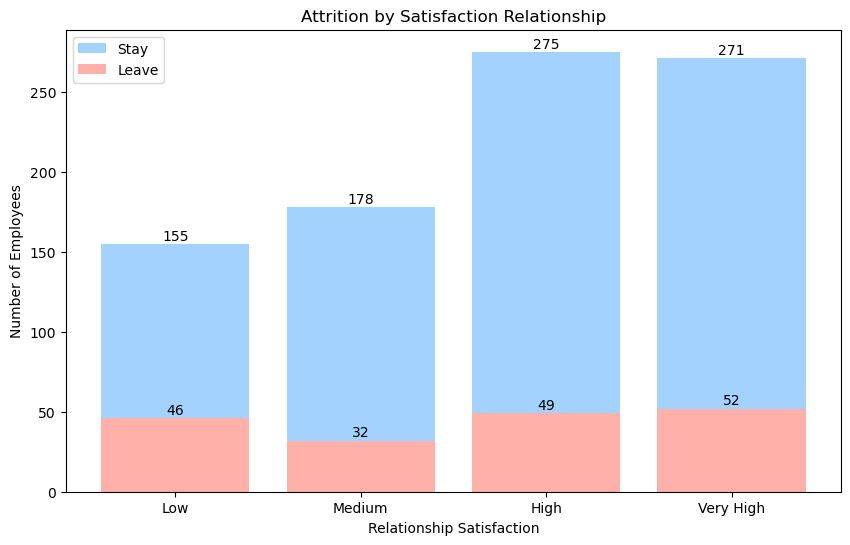

In [40]:
# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
x = attrition_by_relationship_categorical.index
stay = attrition_by_relationship_categorical["Stay"]
leave = attrition_by_relationship_categorical["Leave"]
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Relationship Satisfaction")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Satisfaction Relationship")
ax.legend()
plt.show()

karyawan dengan tingkat Relationship Satisfaction yang paling rendah (Low) mengalami attrition sebesar 46 orang dari 201, yang merupakan proporsi tinggi. Menariknya, kategori Very High justru memiliki angka attrition tertinggi secara absolut (52 orang), namun jumlah karyawan yang bertahan juga tinggi (271), sehingga perlu dianalisis secara persentase untuk mendapatkan gambaran yang akurat. Sementara itu, kategori Medium memiliki angka attrition paling rendah (32 orang), mengindikasikan bahwa tingkat kepuasan hubungan kerja tidak selalu menunjukkan pola linier terhadap keputusan resign, dan mungkin dipengaruhi oleh faktor eksternal lainnya seperti beban kerja atau kompensasi.


#### Attrition by JobInvolvement,


In [41]:
category_involvement = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

df["JobInvolvementCategory"] = pd.cut(
    df["JobInvolvement"],
    bins=[0, 1, 2, 3, 4],
    labels=list(category_involvement.values()),
    right=True,
)

attrition_by_job_involvement = pd.pivot_table(
    df,
    index="JobInvolvementCategory",
    columns="AttritionCategory",
    values="Attrition",
    aggfunc="count",
)

attrition_by_job_involvement

AttritionCategory,Leave,Stay
JobInvolvementCategory,,
Low,22,33
Medium,55,218
High,92,533
Very High,10,95


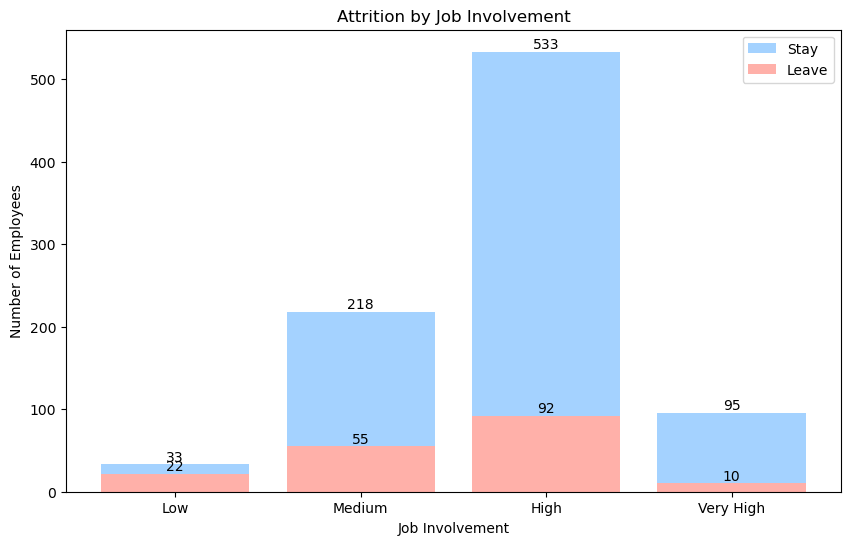

In [42]:
# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
x = attrition_by_job_involvement.index
stay = attrition_by_job_involvement["Stay"]
leave = attrition_by_job_involvement["Leave"]
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Job Involvement")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Job Involvement")
ax.legend()
plt.show()

karyawan dengan Job Involvement tingkat High memiliki angka attrition tertinggi secara absolut, yaitu 92 orang, namun juga memiliki populasi terbesar dalam kelompok Stay (533 orang), menunjukkan partisipasi kerja yang tinggi belum tentu menjamin retensi tanpa dukungan faktor lain. Kategori Medium menunjukkan angka attrition sebesar 55 orang, dengan retensi yang cukup tinggi juga (218 orang). Sementara itu, tingkat keterlibatan Very High memiliki attrition paling rendah (10 orang dari 105), mengindikasikan bahwa keterlibatan kerja yang sangat tinggi cenderung berasosiasi dengan tingkat loyalitas yang lebih besar terhadap perusahaan.


#### Attrition by WorkLifeBalance.


In [43]:
worf_live_balance_category = {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"}

df["WorkLifeBalanceCategory"] = pd.cut(
    df["WorkLifeBalance"],
    bins=[0, 1, 2, 3, 4],
    labels=list(worf_live_balance_category.values()),
    right=True,
)

attrition_by_work_life_balance = pd.pivot_table(
    df,
    index="WorkLifeBalanceCategory",
    columns="AttritionCategory",
    values="Attrition",
    aggfunc="count",
)

attrition_by_work_life_balance

AttritionCategory,Leave,Stay
WorkLifeBalanceCategory,,
Low,18,38
Good,45,206
Excellent,94,544
Outstanding,22,91


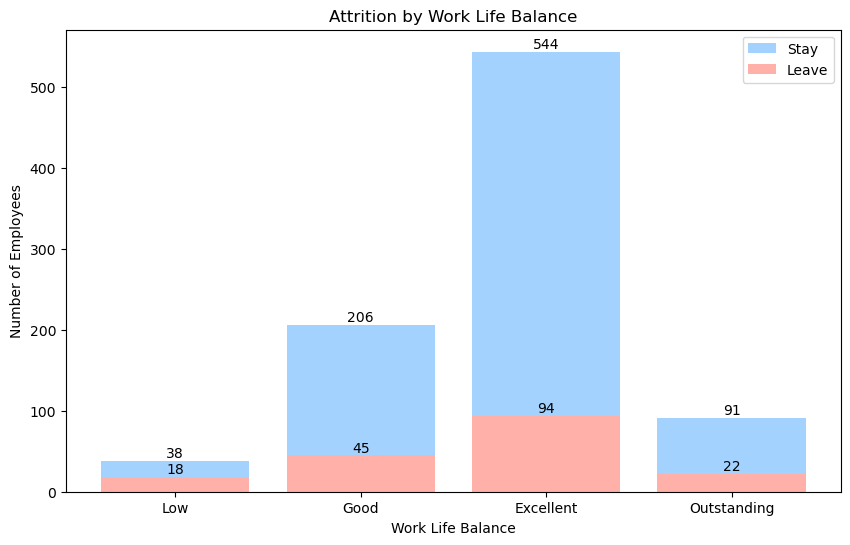

In [44]:
# Visualisasi
fig, ax = plt.subplots(figsize=(10, 6))
x = attrition_by_work_life_balance.index
stay = attrition_by_work_life_balance["Stay"]
leave = attrition_by_work_life_balance["Leave"]
ax.bar(x, stay, label="Stay", color="#A4D2FF")
ax.bar(x, leave, label="Leave", color="#FFB0A9")
for i, v in enumerate(stay):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
for i, v in enumerate(leave):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom", fontsize=10)
ax.set_xlabel("Work Life Balance")
ax.set_ylabel("Number of Employees")
ax.set_title("Attrition by Work Life Balance")
ax.legend()
plt.show()

karyawan dengan Work-Life Balance tingkat High memiliki jumlah attrition tertinggi secara absolut yaitu 94 orang, namun juga mencatat jumlah stay paling tinggi (544 orang), menunjukkan bahwa populasi pada kategori ini cukup besar. Karyawan dengan Very High Work-Life Balance hanya memiliki 22 orang yang resign dari 113 total, mencerminkan tingkat retensi yang baik. Sementara itu, meskipun jumlah leave pada kategori Low relatif kecil (18 orang), rasio terhadap total kelompok (56 orang) cukup tinggi, yang mengindikasikan bahwa keseimbangan kerja-hidup yang buruk berpotensi meningkatkan risiko resign.


In [45]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,AttritionCategory,AgeGroup,EducationCategory,JobRoleCategory,JobLevelCategory,JobSatisfactionCategory,EnvironmentSatisfactionCategory,RelationshipSatisfactionCategory,JobInvolvementCategory,WorkLifeBalanceCategory
1,2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,Leave,35-44,College,Healthcare,Associate,Medium,Low,Low,Low,Low
2,3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,Leave,45-54,Master,Research,Staff,High,Low,High,High,Outstanding
3,4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,Stay,35-44,Bachelor,Sales,Manager,Medium,High,Very High,High,Outstanding
6,7,40,0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,Stay,35-44,College,Sales,Associate,Very High,Medium,High,Low,Good
7,8,55,1,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,Leave,55-64,Bachelor,Management,Senior Manager,Low,Very High,Very High,High,Excellent


In [46]:
# simpan ke file CSV
dataset_dashboard = df.copy()
dataset_dashboard.to_csv("data/dashboard_dataset.csv", index=False)

In [47]:
# Mengubah kategorical ke numerikal
numerikal = {"Yes": 1, "No": 0}
df["OverTimeNum"] = df["OverTime"].map(numerikal)

## Modeling


In [48]:
# Memisahkan fitur dan target untuk model
X = df[
    [
        "DistanceFromHome",
        "EnvironmentSatisfaction",
        "JobInvolvement",
        "JobLevel",
        "JobSatisfaction",
        "MonthlyIncome",
        "OverTimeNum",
        "PerformanceRating",
        "PercentSalaryHike",
        "RelationshipSatisfaction",
        "TotalWorkingYears",
        "WorkLifeBalance",
        "YearsAtCompany",
        "YearsSinceLastPromotion",
    ]
]
y = df["Attrition"]

In [49]:
numeric_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)]
)

In [50]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", LogisticRegression(solver="liblinear", random_state=42)),
    ]
)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['DistanceFromHome',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'OverTimeNum',
                                                   'PerformanceRating',
                                                   'PercentSalaryHike',
                                                   'RelationshipSatisfaction',
                                                   'TotalWorkingYears',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion'])])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [53]:
y_pred = pipeline.predict(X_test)

## Evaluation


In [54]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8584905660377359

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       173
           1       0.80      0.31      0.44        39

    accuracy                           0.86       212
   macro avg       0.83      0.65      0.68       212
weighted avg       0.85      0.86      0.83       212



### Evaluasi Model Logistic Regression: Prediksi Attrition

Model klasifikasi memiliki **akurasi sebesar 85.85%**, yang menunjukkan bahwa secara keseluruhan model mampu memprediksi apakah seorang karyawan akan mengundurkan diri atau tetap bekerja dengan tingkat ketepatan yang cukup tinggi. Namun, akurasi saja tidak cukup untuk menilai performa model, terutama ketika terdapat **ketidakseimbangan data** antar kelas, seperti pada kasus ini.

Dari *classification report*, terlihat bahwa model **sangat baik dalam memprediksi kelas 0 (Stay)** dengan:
- **Precision:** 0.86
- **Recall:** 0.98
- **F1-score:** 0.92

Ini berarti mayoritas karyawan yang memang tetap bekerja berhasil dikenali dengan benar oleh model, dan hanya sedikit yang diprediksi salah.

Namun, performa pada **kelas 1 (Leave)** masih cukup rendah:
- **Precision:** 0.80
- **Recall:** 0.31
- **F1-score:** 0.44

Artinya, model hanya berhasil menangkap sekitar 31% dari seluruh karyawan yang sebenarnya mengundurkan diri. Ini menyebabkan *f1-score* untuk kelas 1 rendah, mencerminkan ketidakseimbangan kemampuan model dalam mendeteksi kasus pengunduran diri.

**Macro average** dan **weighted average** pun menunjukkan perbedaan antara metrik antar kelas:
- **Macro F1-score:** 0.68 → rata-rata tanpa memperhatikan distribusi kelas
- **Weighted F1-score:** 0.83 → rata-rata dengan memperhatikan distribusi kelas, yang cukup tinggi karena dominasi kelas 0

---

## 📌 Kesimpulan

Secara keseluruhan, **model memiliki performa yang sangat baik untuk mendeteksi karyawan yang bertahan**,


## Save Model


In [55]:
import pickle

# Simpan pipeline ke file bernama 'attrition_model.pkl'
with open("model/attrition_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Model berhasil disimpan ke attrition_model.pkl")

Model berhasil disimpan ke attrition_model.pkl


## Mengunggah Model


In [56]:
new_data = pd.DataFrame(
    [
        {
            "DistanceFromHome": 10,
            "EnvironmentSatisfaction": 3,
            "JobInvolvement": 2,
            "JobLevel": 2,
            "JobSatisfaction": 3,
            "MonthlyIncome": 7000,
            "OverTimeNum": 1,
            "PerformanceRating": 3,
            "PercentSalaryHike": 12,
            "RelationshipSatisfaction": 4,
            "TotalWorkingYears": 8,
            "WorkLifeBalance": 2,
            "YearsAtCompany": 4,
            "YearsSinceLastPromotion": 1,
        }
    ]
)

In [57]:
# Load dari pickle
with open("model/attrition_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Prediksi ulang
loaded_pred = loaded_model.predict(new_data)[0]
loaded_proba = loaded_model.predict_proba(new_data)[0]

status = "LEAVE (mengundurkan diri)" if loaded_pred == 1 else "STAY (tetap bekerja)"

print(f"[LOADED MODEL] Prediksi: {loaded_pred} → {status}")
print(f"[LOADED MODEL] Probabilitas [Stay, Leave]: {loaded_proba}")

[LOADED MODEL] Prediksi: 0 → STAY (tetap bekerja)
[LOADED MODEL] Probabilitas [Stay, Leave]: [0.60535736 0.39464264]
